# Assignment_03 - Measures of Central Tendency and Dispersion



In [6]:
# File import and initilisation

import pandas as pd
import matplotlib.pyplot as plt

student = pd.read_csv(r'C:\backupee\MY_New Personal Data\Learnings\Courses\ICT - Data Science & Analytics\Assignments\03_15May\StudentsPerformance.csv')
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [5]:
# 1. Number of males and females participated in the test

gender_counts = student['gender'].value_counts()
print('Gender count:\n') 
gender_counts


Gender count:



female    518
male      482
Name: gender, dtype: int64

Count of parental level of education:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 



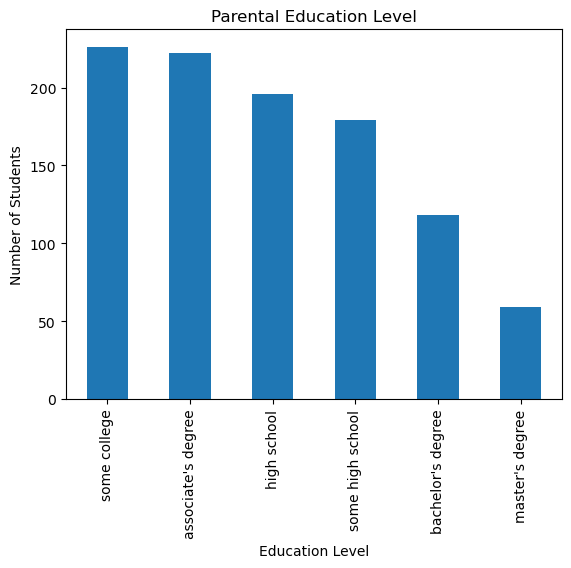

In [8]:
# 2. Parental level of education of the students

parent_edu = student['parental level of education'].value_counts()
print('Count of parental level of education:\n', parent_edu, '\n')
parent_edu.plot(kind='bar')
plt.title('Parental Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Students')
plt.show()

In [13]:
# 3. Who scores the most on average for math, reading and writing based on Gender and Test preparation course?


#3a. Category-wise average of math scores

math_score_avg = student.groupby(['gender', 'test preparation course']).mean()[['math score', 'reading score', 'writing score']]
print('Average math scores by gender and test preparation course:\n')
math_score_avg


Average math scores by gender and test preparation course:



C:\Users\acer\AppData\Local\Temp\ipykernel_14668\692956263.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  math_score_avg = student.groupby(['gender', 'test preparation course']).mean()[['math score', 'reading score', 'writing score']]


math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

In [12]:
# 3b. Who scored maximum based on average math score

max_scores = math_score_avg.idxmax()
result = math_score_avg.loc[max_scores]
result

math score  reading score  writing score
gender test preparation course                                          
male   completed                 72.988506      70.793103      70.339080
female completed                 67.108696      77.375000      78.793478
       completed                 67.108696      77.375000      78.793478

In [11]:
# 4. What do you think about the scoring variation for math, reading and writing based on Gender and Test preparation course?

# 4a. Variation in terms of standard deviation

score_variation = student.groupby(['gender', 'test preparation course']).std()[['math score', 'reading score', 'writing score']]
print('Scores variation by gender and test preparation course:\n')
score_variation



Scores variation by gender and test preparation course:



C:\Users\acer\AppData\Local\Temp\ipykernel_14668\3887879914.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_variation = student.groupby(['gender', 'test preparation course']).std()[['math score', 'reading score', 'writing score']]


math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284

In [15]:
# 4b. Variation in terms of all major statistical parameters

grouped = student.groupby(['gender', 'test preparation course'])
key_variations = grouped[['math score', 'reading score', 'writing score']].describe()
key_variations

math score                                     \
                                    count       mean        std   min    25%   
gender test preparation course                                                 
female completed                    184.0  67.108696  14.428233  23.0  58.75   
       none                         334.0  61.320359  16.510686   0.0  52.00   
male   completed                    174.0  72.988506  14.039164  39.0  63.00   
       none                         308.0  66.467532  14.335746  27.0  57.00   

                                                  reading score             \
                                 50%   75%    max         count       mean   
gender test preparation course                                               
female completed                67.0  76.0   99.0         184.0  77.375000   
       none                     62.0  73.0  100.0         334.0  69.955090   
male   completed                74.0  82.0  100.0         174.0  70.793103   
       none                     67.0  76.0   97.0         308.0  62.581169   

                                ...              writing score             \
                                ...   75%    max         count       mean   
gender test preparation course  ...                                         
female completed                ...  86.0  100.0         184.0  78.793478   
       none                     ...  80.0  100.0         334.0  68.982036   
male   completed                ...  81.0  100.0         174.0  70.339080   
       none                     ...  73.0   96.0         308.0  59.551948   

                                                                           
                                      std   min   25%   50%    75%    max  
gender test preparation course                                             
female completed                12.240788  36.0  72.0  79.0  87.25  100.0  
       none                     15.016497  10.0  60.0  70.0  79.00  100.0  
male   completed                12.887910  38.0  62.0  71.0  79.00  100.0  
       none                     13.468284  15.0  51.0  60.0  69.00   92.0  

[4 rows x 24 columns]

In [16]:
# 5. To identify the top 25% of students based on their math score

student.sort_values(by='math score', ascending=False, inplace=True)
percentile = student['math score'].quantile(0.75)
top_25_percent = student[student['math score'] >= percentile]
top_25_percent

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91
